# Setup

In this tutorial we use the defaul version of the CTGAN:
https://github.com/sdv-dev/CTGAN

We also need to install table evaluator to evaluate the quality of the generated synthetic data.

In [1]:
%pip install ctgan


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip install table_evaluator

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Now we download a dataset that includes both continuous and discrete values. I chose a random dataset from Kaggle: https://www.kaggle.com/datasets/mirichoi0218/insurance

In [4]:
!gdown 1CFLXcella3VFDzPJRGrfkGlYNOhf1RCQ

'gdown' is not recognized as an internal or external command,
operable program or batch file.


In [1]:
import pandas as pd
data = pd.read_csv('./insurance.csv')

In [2]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Next, we define a list with column names for categorical variables. This list will be passed to the model so that the model can decide how to process these fields.

In [5]:
categorical_features = ['age','sex','children','smoker','region']

#Model training

Next, we simply define an instance of CTGANSynthesizer and call the fit method with the dataframe and the list of categorical variables.

We train the model for 300 epochs only as the discriminator and generator loss becomes quite low after these many epochs.

In [6]:
from ctgan import CTGAN

ctgan = CTGAN(verbose=True)
ctgan.fit(data, categorical_features, epochs = 200)

Gen. (-0.01) | Discrim. (-0.14): 100%|██████████| 200/200 [00:28<00:00,  6.93it/s]


#Synthetic data generation

In [7]:
samples = ctgan.sample(1000)

In [8]:
samples

,age,sex,bmi,children,smoker,region,charges
0,45,male,30.192458,3,yes,southwest,2656.068361
1,26,female,23.914042,2,no,southwest,2056.364813
2,42,female,22.987987,2,yes,southwest,17096.211299
3,20,male,38.967361,4,yes,northeast,7461.920655
4,62,female,45.785235,2,yes,northeast,14555.048650
...,...,...,...,...,...,...,...
995,32,female,43.287037,1,no,southeast,53061.141683
996,20,male,34.412138,3,yes,northeast,-865.024570
997,40,female,20.166814,1,yes,southeast,1155.340919
998,62,male,16.807351,2,no,southeast,1589.392941


#Evaluation

IPython not installed.
(1338, 7) (1000, 7)


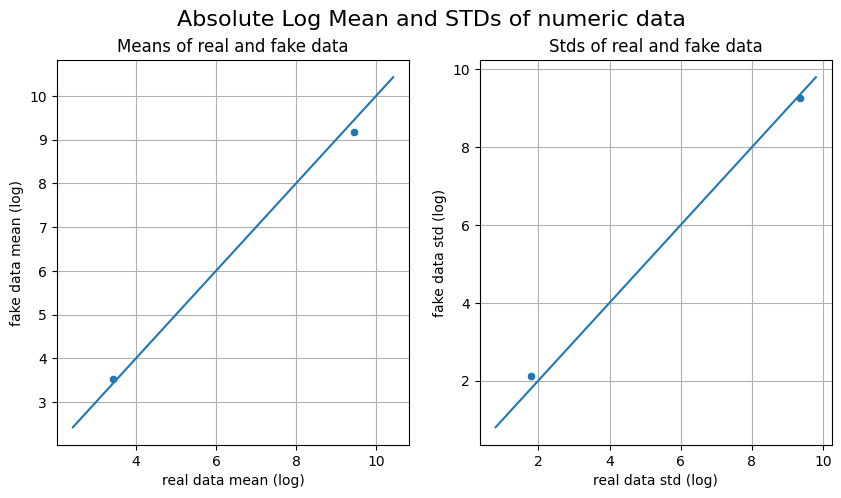

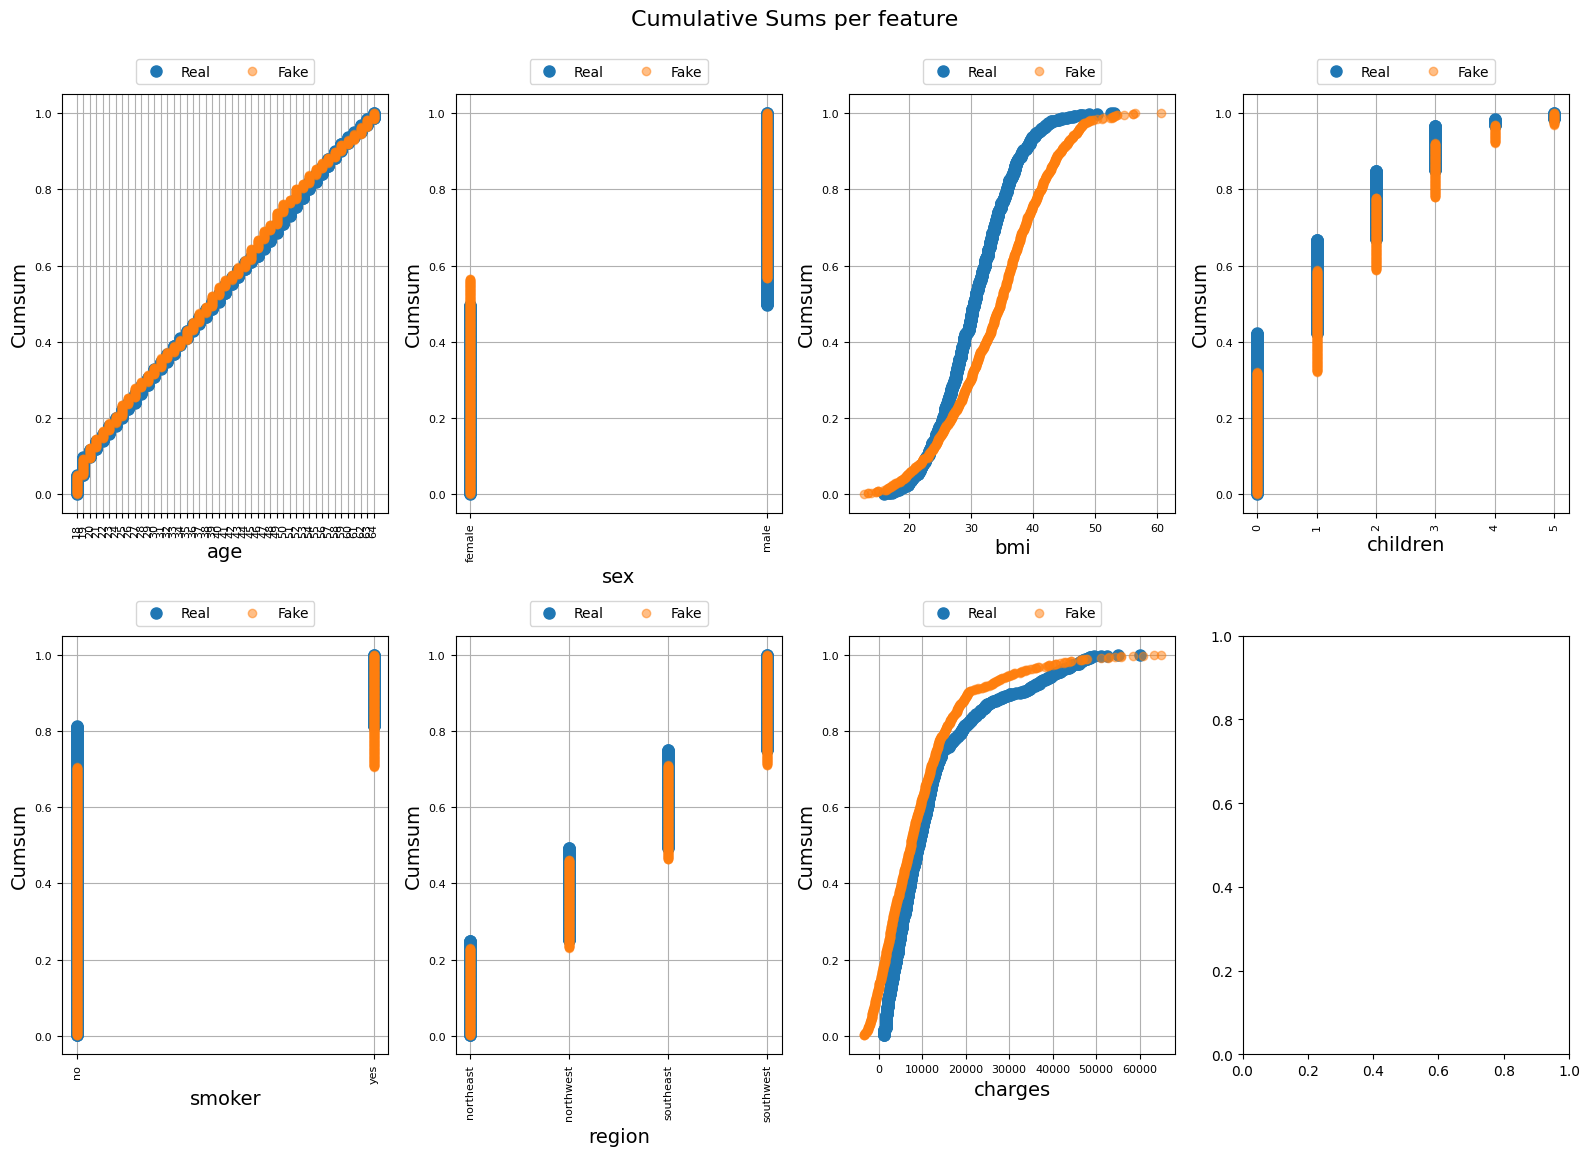

c:\Users\Pengu\AppData\Local\Programs\Python\Python310\lib\site-packages\table_evaluator\table_evaluator.py:182: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
c:\Users\Pengu\AppData\Local\Programs\Python\Python310\lib\site-packages\table_evaluator\table_evaluator.py:182: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
c:\Users\Pengu\AppData\Local\Programs\Python\Python310\lib\site-packages\table_evaluator\table_evaluator.py:182: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
c:\Users\Pengu\AppData\Local\Programs\Python\Python310\lib\site-packag

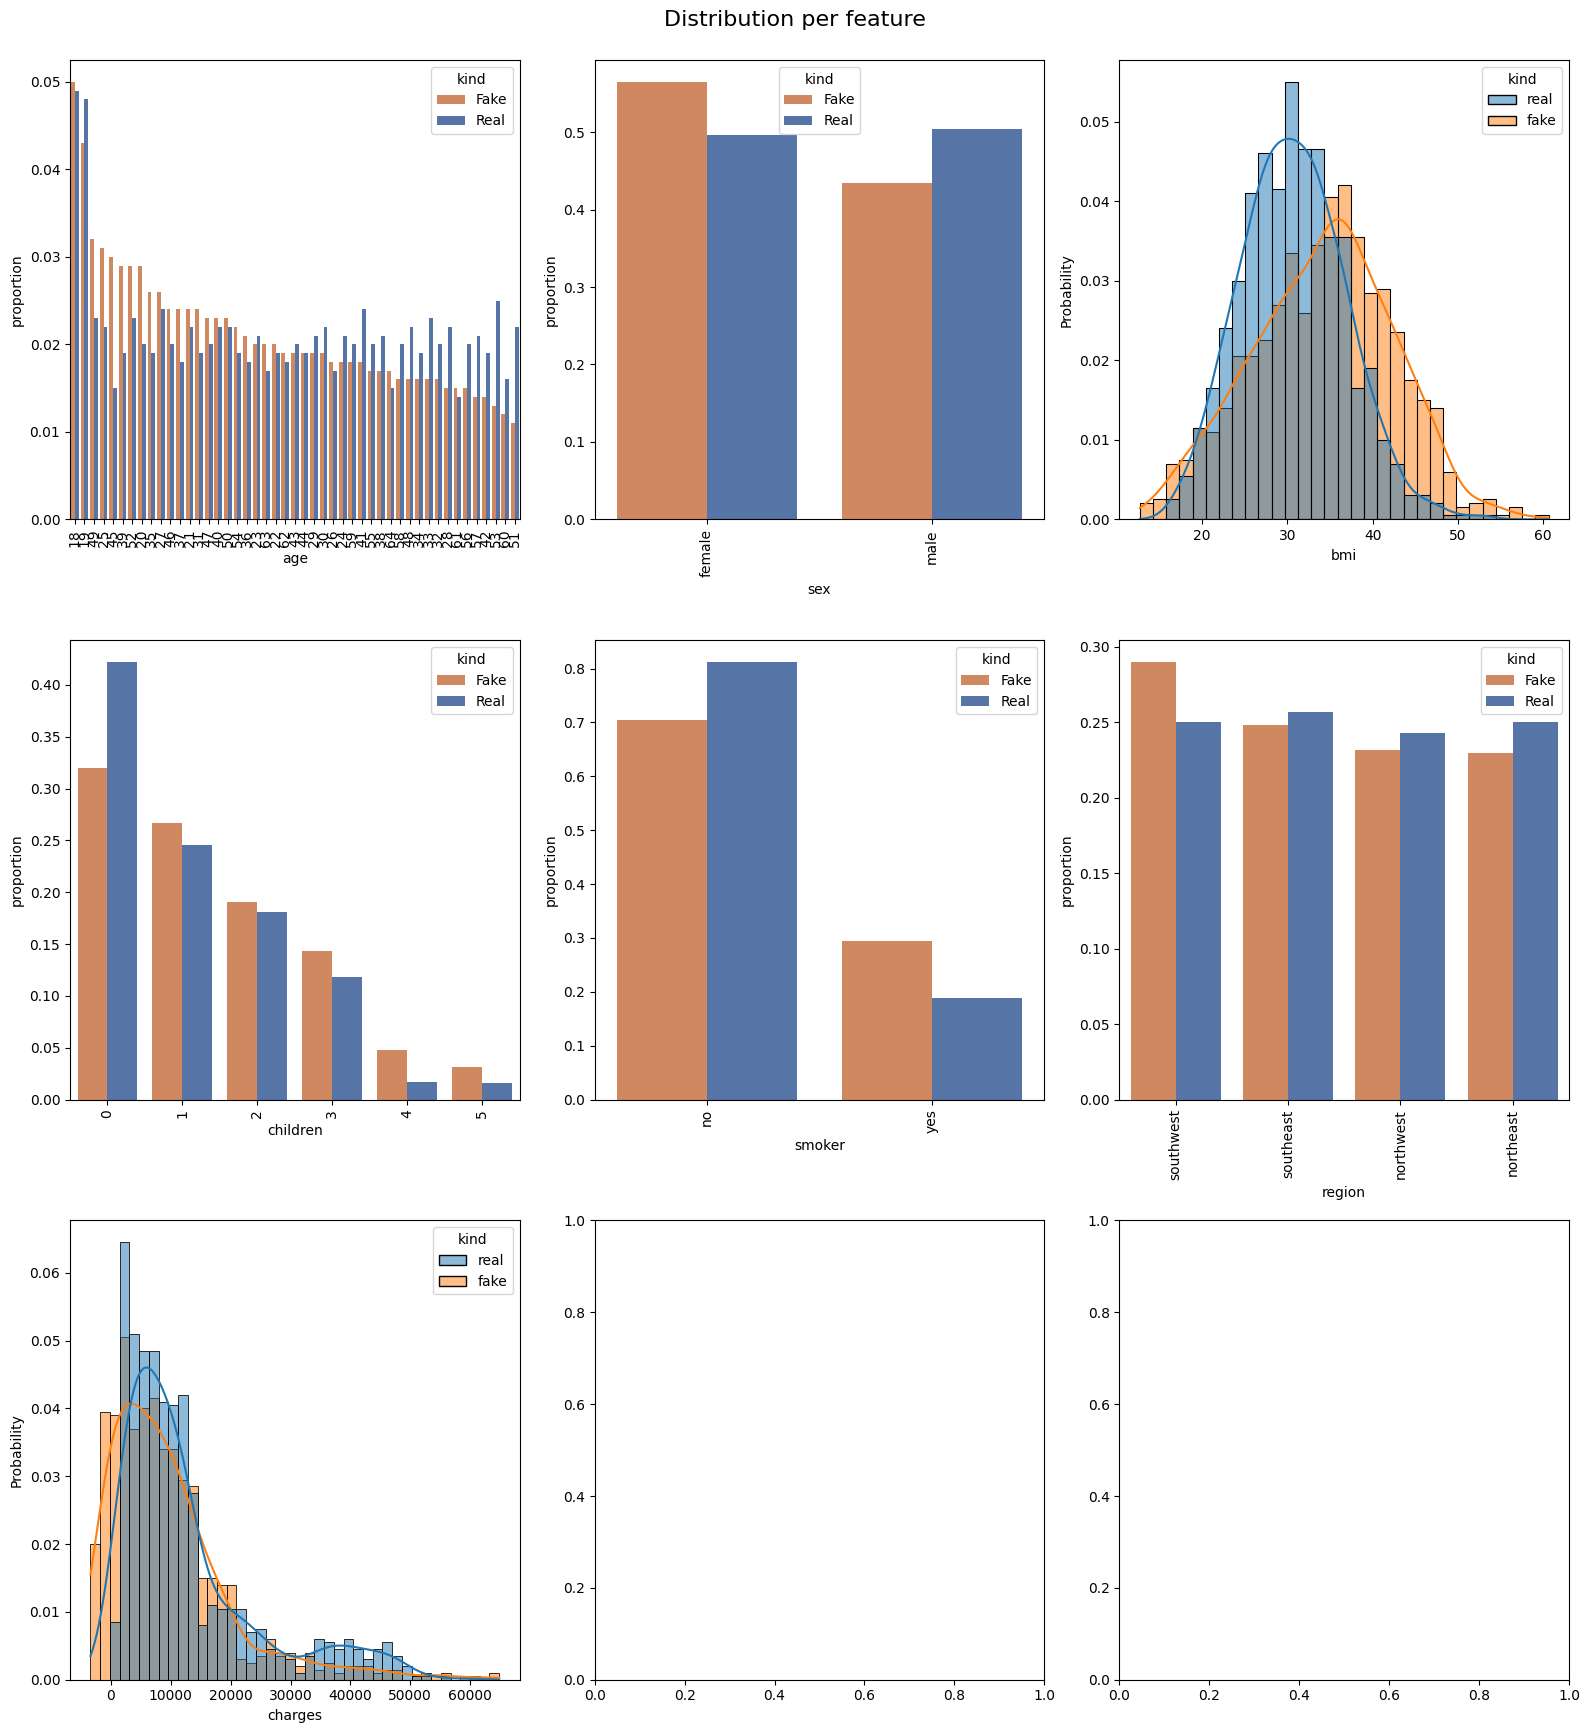

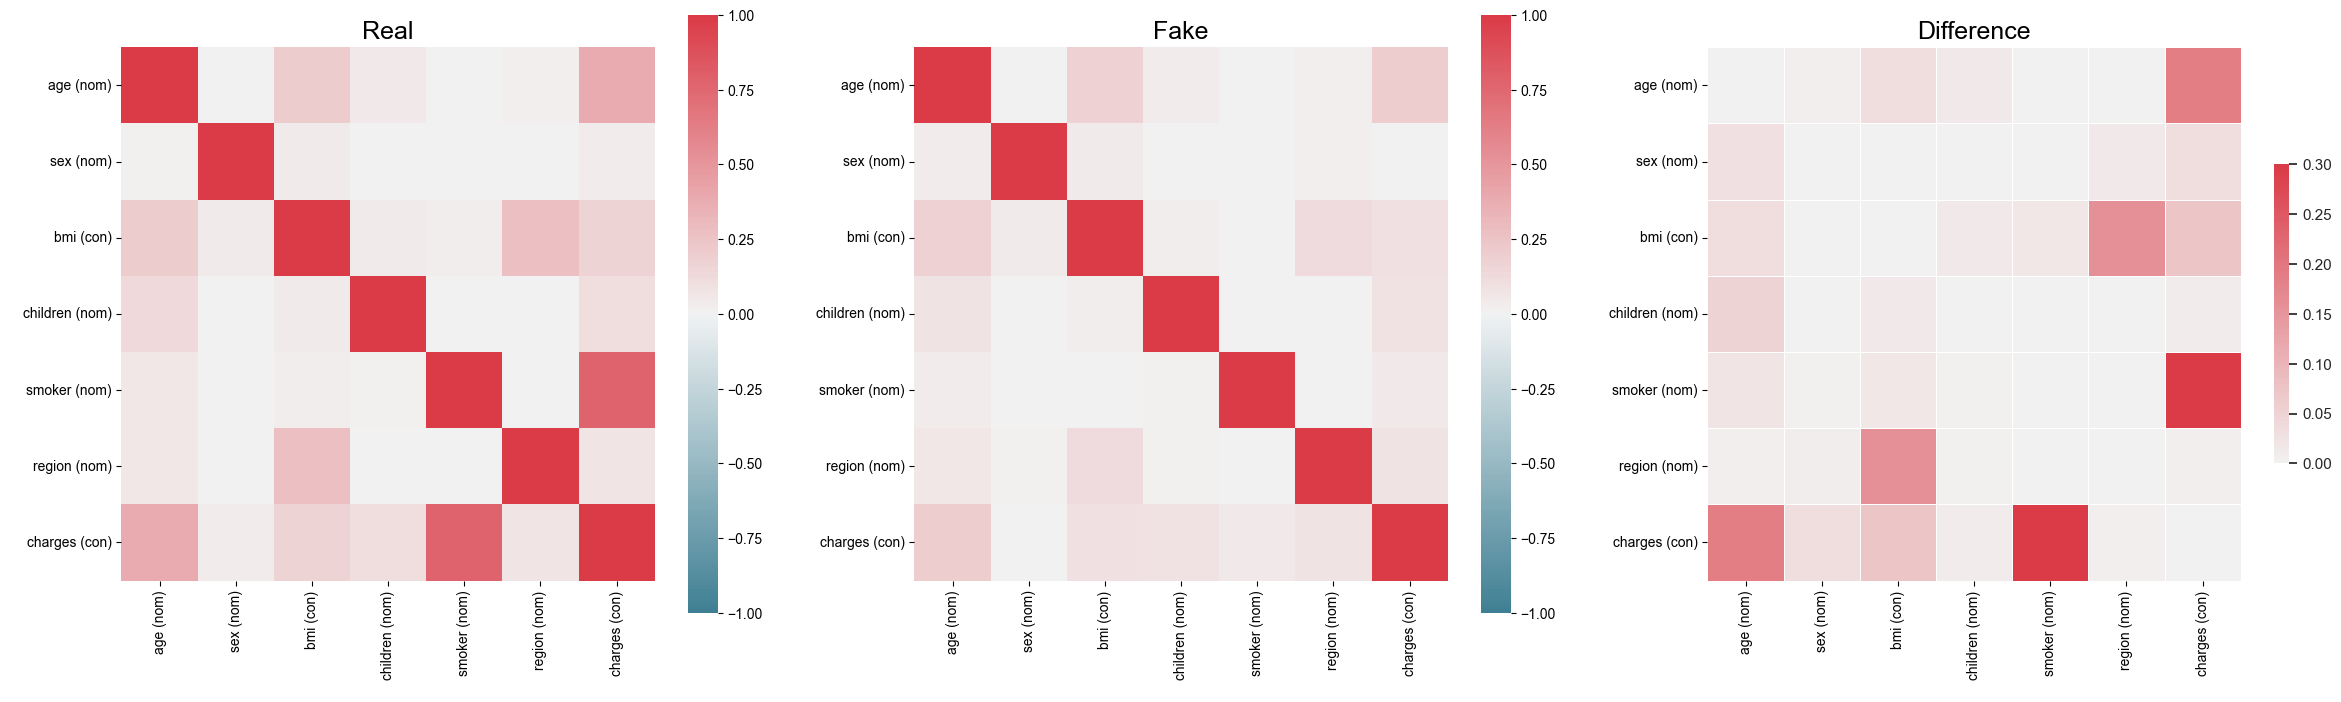

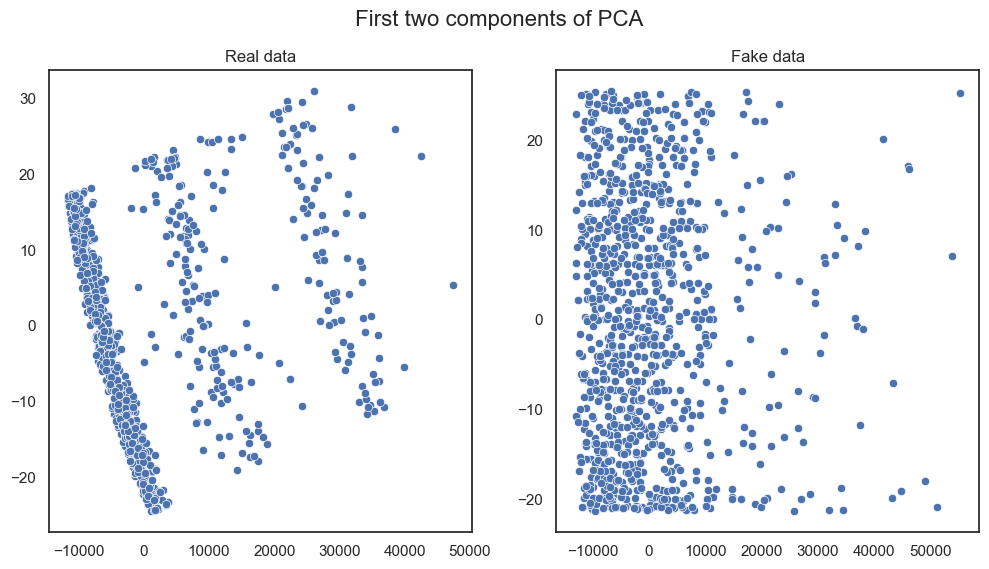

In [9]:
from table_evaluator import TableEvaluator

print(data.shape, samples.shape)
table_evaluator =  TableEvaluator(data, samples, cat_cols= categorical_features)

table_evaluator.visual_evaluation()